In [1]:
import pandas as pd
import numpy as np
import hashlib
import matplotlib.pyplot as plt

np.random.seed(123)
n = 1000

consent_types = ["explicit", "implicit", "none"]
countries = ["USA", "UK", "Germany", "India", "Japan"]

data = pd.DataFrame({
    "Device_ID": range(1, n+1),
    "User_Age": np.random.randint(18, 80, n),
    "Country": np.random.choice(countries, n),
    "Consent_Type": np.random.choice(consent_types, n, p=[0.65, 0.25, 0.10]),
    "Average_HeartRate": np.random.randint(50, 160, n),
    "Daily_Steps": np.random.randint(1000, 20000, n),
    "Sleep_Hours": np.round(np.random.uniform(3, 10, n), 1),
    "GPS_Location_Share": np.random.choice([0, 1], n, p=[0.7, 0.3]),
    "Health_Alert": np.random.choice([0, 1], n, p=[0.85, 0.15])
})

data.head()

,Device_ID,User_Age,Country,Consent_Type,Average_HeartRate,Daily_Steps,Sleep_Hours,GPS_Location_Share,Health_Alert
0,1,63,Japan,implicit,71,11067,3.4,0,0
1,2,20,India,none,57,2646,3.1,1,0
2,3,46,Germany,explicit,89,14118,9.3,0,1
3,4,52,USA,explicit,143,7137,8.7,1,0
4,5,56,UK,explicit,77,17093,7.6,0,0


In [2]:
def filter_valid_consent(df):
    return df[df["Consent_Type"] != "none"]

valid_data = filter_valid_consent(data)

print(f"Before filtering: {len(data)} records")
print(f"After filtering: {len(valid_data)} records")

Before filtering: 1000 records
After filtering: 902 records


Consent_Type
explicit    0.634
implicit    0.268
none        0.098
Name: proportion, dtype: float64


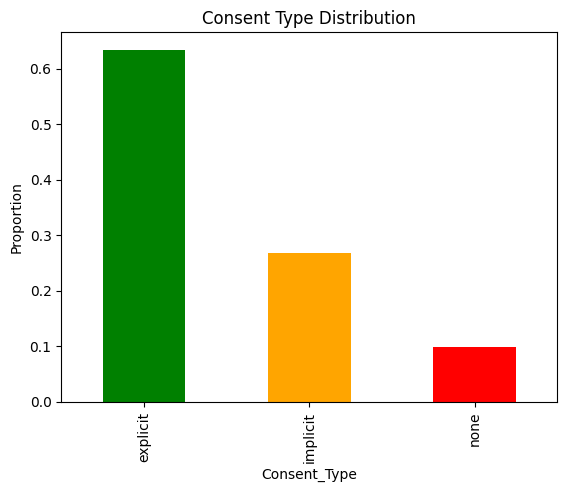

Implicit consent is risky for wearables because users may be unaware of background data collection.


In [3]:
consent_counts = data["Consent_Type"].value_counts(normalize=True)
print(consent_counts)

consent_counts.plot(kind="bar", title="Consent Type Distribution", color=['green','orange','red'])
plt.ylabel("Proportion")
plt.show()

print("Implicit consent is risky for wearables because users may be unaware of background data collection.")

Country
Germany    0.096154
India      0.134615
Japan      0.161616
UK         0.158730
USA        0.152284
Name: Health_Alert, dtype: float64


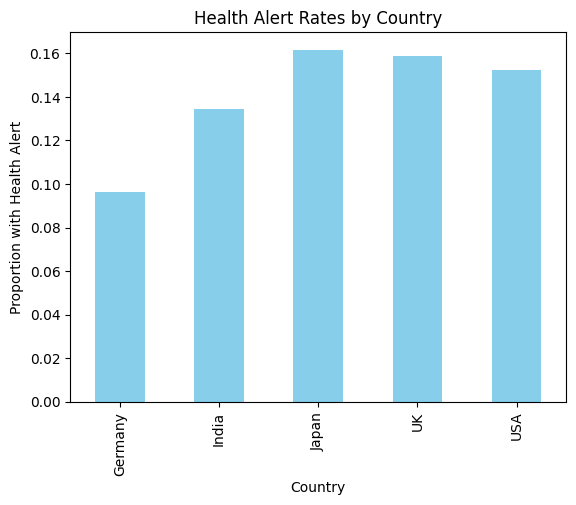

Any large differences might be due to actual health factors or different adoption/user bases by country.


In [4]:
# Health alert rates by country
alert_rates = data.groupby("Country")["Health_Alert"].mean()
print(alert_rates)

alert_rates.plot(kind="bar", title="Health Alert Rates by Country", color='skyblue')
plt.ylabel("Proportion with Health Alert")
plt.show()

print("Any large differences might be due to actual health factors or different adoption/user bases by country.")

In [5]:
steps_dataset = data[["Country", "Daily_Steps"]]
steps_dataset.head()

print("This dataset excludes heart rate, GPS and other sensitive info, helping reduce risk exposure.")

This dataset excludes heart rate, GPS and other sensitive info, helping reduce risk exposure.


In [6]:
data["Device_PseudoID"] = data["Device_ID"].apply(lambda x: hashlib.sha256(str(x).encode()).hexdigest())
data_pseudo = data.drop(columns=["Device_ID"])
data_pseudo.head()

,User_Age,Country,Consent_Type,Average_HeartRate,Daily_Steps,Sleep_Hours,GPS_Location_Share,Health_Alert,Device_PseudoID
0,63,Japan,implicit,71,11067,3.4,0,0,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
1,20,India,none,57,2646,3.1,1,0,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
2,46,Germany,explicit,89,14118,9.3,0,1,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...
3,52,USA,explicit,143,7137,8.7,1,0,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...
4,56,UK,explicit,77,17093,7.6,0,0,ef2d127de37b942baad06145e54b0c619a1f22327b2ebb...


In [7]:
data["Device_PseudoID"] = data["Device_ID"].apply(lambda x: hashlib.sha256(str(x).encode()).hexdigest())
data_pseudo = data.drop(columns=["Device_ID"])
data_pseudo.head()

,User_Age,Country,Consent_Type,Average_HeartRate,Daily_Steps,Sleep_Hours,GPS_Location_Share,Health_Alert,Device_PseudoID
0,63,Japan,implicit,71,11067,3.4,0,0,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
1,20,India,none,57,2646,3.1,1,0,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
2,46,Germany,explicit,89,14118,9.3,0,1,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...
3,52,USA,explicit,143,7137,8.7,1,0,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...
4,56,UK,explicit,77,17093,7.6,0,0,ef2d127de37b942baad06145e54b0c619a1f22327b2ebb...


In [8]:
# Auxiliary dataset from external source
aux_data = data[["User_Age", "Country"]].sample(150, random_state=1)

# Attempt naive re-identification
matches = pd.merge(data_pseudo, aux_data, on=["User_Age", "Country"])
match_rate = len(matches) / len(aux_data) * 100
print(f"Potential re-identification match rate: {match_rate:.2f}%")

Potential re-identification match rate: 410.67%


In [9]:
access_matrix = pd.DataFrame({
    "Field": ["Device_ID", "Country", "Average_HeartRate", "Daily_Steps", "Sleep_Hours", "GPS_Location_Share", "Health_Alert"],
    "Admin": ["Read/Write"]*7,
    "Data_Scientist": ["No Access", "Read", "Read", "Read", "Read", "Read", "Read"],
    "Research_Partner": ["No Access", "Read", "Anonymized", "Read", "Read", "No Access", "Aggregated Only"]
})

print(access_matrix)
print("\nHealthcare Data Steward role: Ensure compliance with privacy regulations, approve access, keep lineage logs, respond to incidents.")

                Field       Admin Data_Scientist Research_Partner
0           Device_ID  Read/Write      No Access        No Access
1             Country  Read/Write           Read             Read
2   Average_HeartRate  Read/Write           Read       Anonymized
3         Daily_Steps  Read/Write           Read             Read
4         Sleep_Hours  Read/Write           Read             Read
5  GPS_Location_Share  Read/Write           Read        No Access
6        Health_Alert  Read/Write           Read  Aggregated Only

Healthcare Data Steward role: Ensure compliance with privacy regulations, approve access, keep lineage logs, respond to incidents.


In [10]:
# Quality checks
print("Missing Values:\n", data.isnull().sum())
print("Invalid Sleep_Hours (>24):", (data["Sleep_Hours"] > 24).sum())

# Lineage log simulation
lineage_log = []
lineage_log.append({"step": "raw_ingest", "records": len(data)})
lineage_log.append({"step": "consent_filter", "records": len(valid_data)})
print("\nLineage Log:", lineage_log)

Missing Values:
 Device_ID             0
User_Age              0
Country               0
Consent_Type          0
Average_HeartRate     0
Daily_Steps           0
Sleep_Hours           0
GPS_Location_Share    0
Health_Alert          0
Device_PseudoID       0
dtype: int64
Invalid Sleep_Hours (>24): 0

Lineage Log: [{'step': 'raw_ingest', 'records': 1000}, {'step': 'consent_filter', 'records': 902}]


In [11]:
# Aggregate by country
agg_health = data.groupby("Country").agg({
    "Daily_Steps": "mean",
    "Average_HeartRate": "mean",
    "Health_Alert": "mean"
}).reset_index()

print("Aggregated Public Health Report:\n", agg_health)

# Approval logic
def approve_request(req_type):
    if req_type in ["aggregated", "anonymized"]:
        return "Approved"
    return "Denied"

for req in ["aggregated", "anonymized", "full"]:
    print(f"{req} data request: {approve_request(req)}")

Aggregated Public Health Report:
    Country   Daily_Steps  Average_HeartRate  Health_Alert
0  Germany  11158.956731         105.201923      0.096154
1    India  10652.423077         103.759615      0.134615
2    Japan  10212.025253         108.883838      0.161616
3       UK  10156.412698         105.343915      0.158730
4      USA  10628.548223         107.720812      0.152284
aggregated data request: Approved
anonymized data request: Approved
full data request: Denied


In [12]:
# Consent compliance ratio
consent_ratio = len(valid_data) / len(data)

# Disparity in Health Alert rates
alert_disparity = alert_rates.max() - alert_rates.min()

print(f"Consent Compliance: {consent_ratio:.2f}")
print(f"Health Alert Disparity: {alert_disparity:.2f}")

if consent_ratio < 0.95:
    print("⚠ ALERT: Consent compliance below threshold.")
if alert_disparity > 0.12:
    print("⚠ ALERT: Large disparity in health alerts detected.")

print("\nEscalation Steps:")
print("1. Notify Data Steward")
print("2. Investigate cause (sampling bias, quality issue)")
print("3. Apply corrective action (rebalancing, additional consent requests)")
print("4. Document and report resolution")

Consent Compliance: 0.90
Health Alert Disparity: 0.07
⚠ ALERT: Consent compliance below threshold.

Escalation Steps:
1. Notify Data Steward
2. Investigate cause (sampling bias, quality issue)
3. Apply corrective action (rebalancing, additional consent requests)
4. Document and report resolution
